
# Análise dos Dados
Este script tem como objetivo realizar uma análise sobre a base de dados para extrair informações úteis para o negócio.
As análise serão realizadas com:
- métodos estatístico descritivos
- visualização (gráficos)
- aplicação de algoritmo de agrupamento(cluster)


1. [Análises dos Dados](#analises)
2. [Análise com mineração de dados (cluster)](#cluster)
3. [Conclusões](#conclusao)

<font color='red'> Os resultados deste scritp seria mostrado para a equipe de negócio(cliente) </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## alterando cores padrões para diferenciar bem a classe YES e NO
cores_classe = [sns.color_palette("hls", 5)[0],sns.color_palette("hls", 5)[2]]
sns.set_palette(cores_classe)

In [2]:
dados = pd.read_csv('data/dados_limpos.csv')

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31140 entries, 0 to 40689
Data columns (total 27 columns):
age              31140 non-null int64
job              31140 non-null object
marital          31140 non-null object
education        31140 non-null object
default          31140 non-null object
housing          31140 non-null object
loan             31140 non-null object
contact          31140 non-null object
day              31140 non-null int64
month            31140 non-null object
duration         31140 non-null int64
campaign         31140 non-null int64
pdays            31140 non-null int64
poutcome         31140 non-null object
y                31140 non-null object
month_new        31140 non-null int64
job_new          31140 non-null int64
marital_new      31140 non-null int64
education_new    31140 non-null int64
default_new      31140 non-null int64
housing_new      31140 non-null int64
loan_new         31140 non-null int64
contact_new      31140 non-null int64
poutcom

In [4]:
## selecionando algumas colunas mais importantes
colunas_selecionadas = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','duration_new',
                        'contact', 'day', 'month', 'campaign', 'pdays', 'poutcome','y']

In [5]:
dados_selec = dados[colunas_selecionadas]


## <a id = "analises"> 1. Análise dos Dados </a>


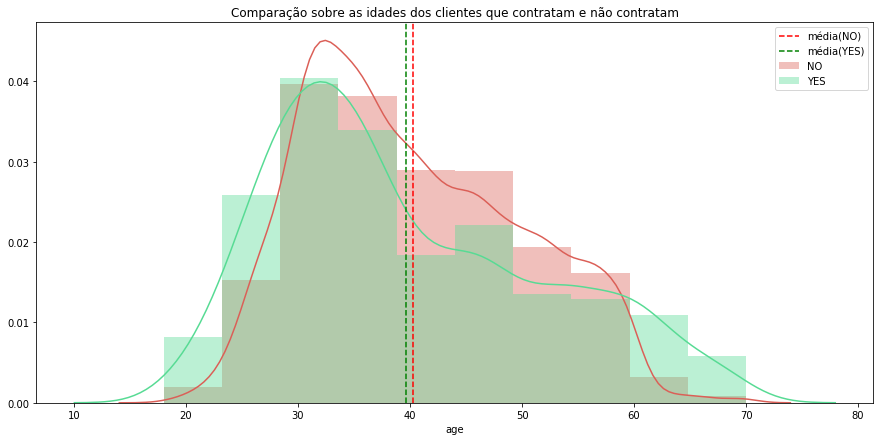

In [6]:

plt.figure(figsize=(15,7))
sns.distplot(dados_selec[dados_selec.y == 'no'].age, kde = True, bins = 10, label = 'NO')
sns.distplot(dados_selec[dados_selec.y == 'yes'].age, kde = True, bins = 10, label = 'YES')

plt.axvline(dados_selec[dados_selec.y == 'no'].age.mean(), color = 'r', linestyle = 'dashed')#,linewidth = 1)
plt.axvline(dados_selec[dados_selec.y == 'yes'].age.mean(), color = 'g', linestyle = 'dashed')
plt.legend(('média(NO)','média(YES)','NO', 'YES'))
plt.title('Comparação sobre as idades dos clientes que contratam e não contratam')
plt.show()

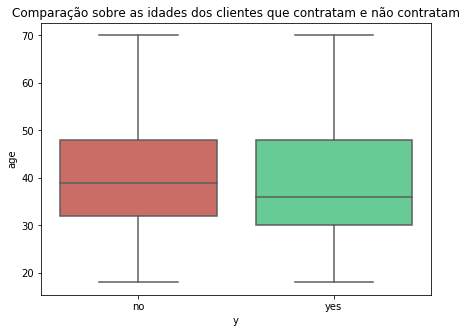

In [7]:
# - idade x y (boxplot)
plt.figure(figsize=(7,5))
sns.boxplot(x='y', y = 'age', data=dados_selec)
plt.title('Comparação sobre as idades dos clientes que contratam e não contratam')
plt.show()

- podemos observar que a idade dos clientes que contrataram e não contrataram o serviço é bem semelhante
- a tendencia central (média e mediana) das idade são bem próxima (40(no) - 39(yes)
- cliente entre 20 e 35 anos, e acima de 60 anos tendem a contratar os serviços, ao contrário dos cliente entre 35 e 60 anos

Podemos então afirmar que a idade média dos clientes são iguais para quem contrata e não contrata? 
Vamos fazer o teste de hipótese para verificar essa afirmação:

In [8]:
from scipy import stats
age_yes = dados_selec[dados_selec.y == 'yes']['age'].to_numpy()
age_no  = dados_selec[dados_selec.y == 'no']['age'].to_numpy()

_, p_value = stats.mannwhitneyu(age_no, age_yes) ## vai considerar que amostrar é NÃO distribuição normal

alpha = 0.05
print('Média Idade (YES) == Média Idade (NO)?')#, p-value = ', p_value)

if(p_value < alpha):
    print('O valor médio da idade não são iguais')
else:
    print('O valor médio da idade são iguais')



Média Idade (YES) == Média Idade (NO)?
O valor médio da idade não são iguais


- Com base no teste de hipótese podemos afirmar que a idade média dos clientes **não são iguais** para quem contrata e não contrata.

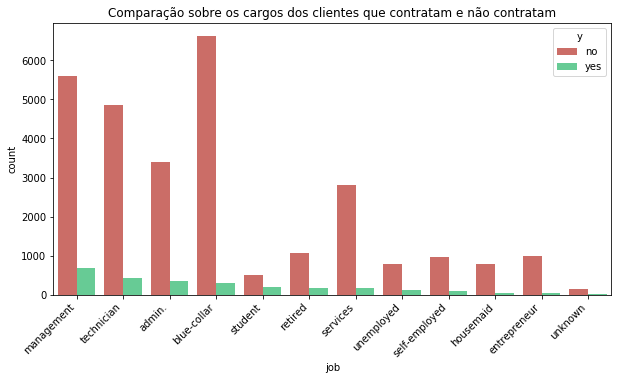

In [9]:
#- job x y (barras)
plt.figure(figsize=(10,5))
order = dados_selec[dados_selec.y == 'yes']['job'].value_counts().index

chart = sns.countplot(x = 'job', hue = 'y', data=dados_selec, order = order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Comparação sobre os cargos dos clientes que contratam e não contratam')

plt.show()

- cliente com cargos de `management, tech e admin` tendem a contratar mais.
- Porém os mesmos cargos também são os que não tendem a contratar o serviços.


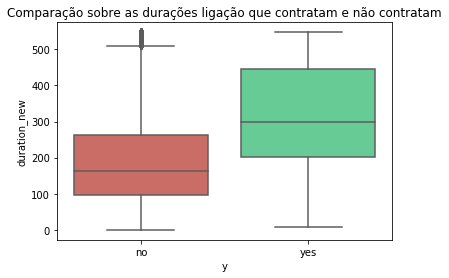

In [10]:
#- duration x y (boxplot)
sns.boxplot(x='y', y = 'duration_new', data=dados_selec)
plt.title('Comparação sobre as durações ligação que contratam e não contratam')
plt.show()

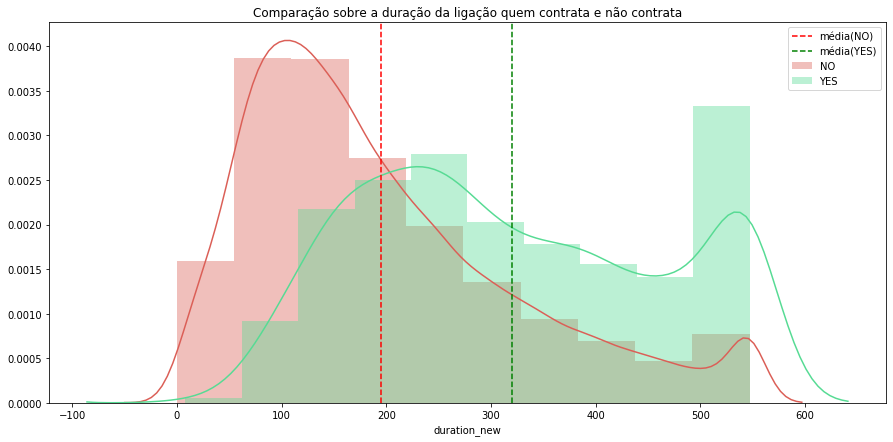

In [11]:
plt.figure(figsize=(15,7))
sns.distplot(dados_selec[dados_selec.y == 'no'].duration_new, kde = True, bins = 10, label = 'NO')
sns.distplot(dados_selec[dados_selec.y == 'yes'].duration_new, kde = True, bins = 10, label = 'YES')

plt.axvline(dados_selec[dados_selec.y == 'no'].duration_new.mean(), color = 'r', linestyle = 'dashed')#,linewidth = 1)
plt.axvline(dados_selec[dados_selec.y == 'yes'].duration_new.mean(), color = 'g', linestyle = 'dashed')
plt.title('Comparação sobre a duração da ligação quem contrata e não contrata')
plt.legend(('média(NO)','média(YES)','NO', 'YES'))
plt.show()

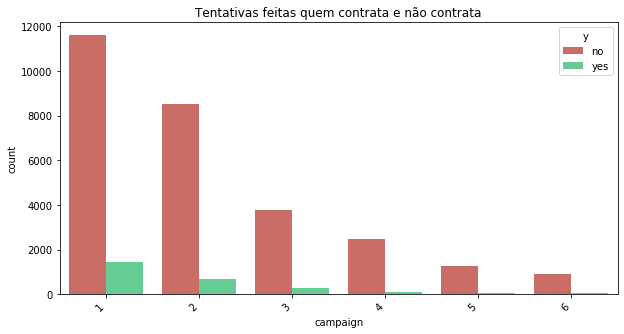

In [12]:
# - campaign x y (barras)
plt.figure(figsize=(10,5))
order = dados_selec[dados_selec.y == 'yes']['campaign'].value_counts().index

chart = sns.countplot(x = 'campaign', hue = 'y', data=dados_selec, order = order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Tentativas feitas quem contrata e não contrata')

plt.show()


- ligações que duraram em média ~300 segundos, vendem o produto. As ligações podem variar entre 200 e 450 segundos 
- já ligações mais curtas, que duram em média ~200 segundos, os clientes não querem contratar o serviço. As ligações podem variar entre 10 e 250 segundos.



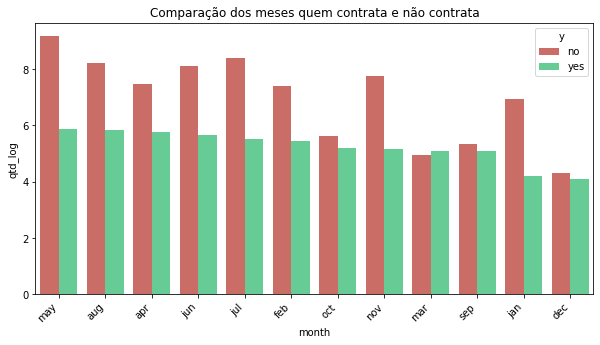

In [13]:
## criando nova base com LOG para melhorar a visualização
groupBy_df = pd.DataFrame(columns=['month','y','qtd'])
i = 0
groupBy = dados_selec.groupby(['month','y'])['y'].count()

for x in zip(groupBy.index, groupBy.values):
    groupBy_df.loc[i, ['month','y','qtd']] = (x[0][0],x[0][1],x[1])
    i += 1

groupBy_df['qtd_log'] = np.log(groupBy_df.qtd.to_list())

# - month x y (barras)
plt.figure(figsize=(10,5))
order = groupBy_df[groupBy_df.y == 'yes'].sort_values(by=['qtd'], ascending=False).month

chart = sns.barplot(x = 'month', y='qtd_log' , hue = 'y', data=groupBy_df, order = order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Comparação dos meses quem contrata e não contrata')

plt.show()


- podemos observar que os meses que há mais contratação(`maio, agosto, abril e junho`) também são os meses que há mais rejeição do novo serviço. Pode-se fazer tentativas nestes meses.

- Mas fazendo uma análise mais afundo, podemos observar que ligações feitas no mês de `março`  tendem a ter mais efetividade para o cliente aderir ao novo serviço, já que é o mês que o número de contratação ultrapassa de rejeição. Os meses de `outubro, setembro e dezembro` também são boas oportunidades, já que a rejeição está próxima da aceitação.


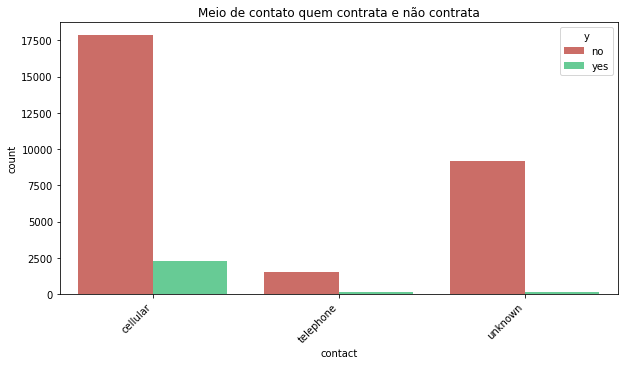

In [14]:
# - contact x y (barras)
plt.figure(figsize=(10,5))
order = dados_selec[dados_selec.y == 'yes']['contact'].value_counts().index

chart = sns.countplot(x = 'contact', hue = 'y', data=dados_selec, order = order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Meio de contato quem contrata e não contrata')

plt.show()


- como boa parte dos contatos são realizados para celulares, então, a tendência era tanto para rejeição como adesão fosse por esse meio de contato. 

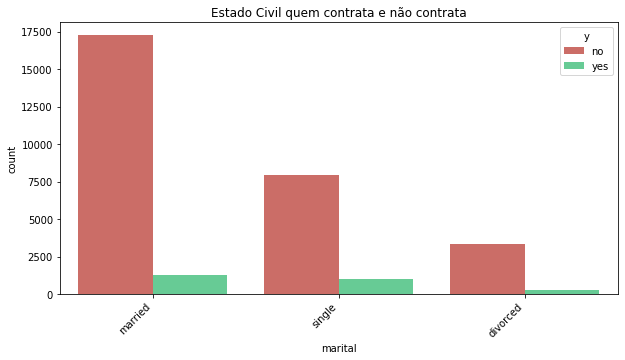

In [15]:
# - marital x y (barras)
plt.figure(figsize=(10,5))
order = dados_selec[dados_selec.y == 'yes']['marital'].value_counts().index

chart = sns.countplot(x = 'marital', hue = 'y', data=dados_selec, order = order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Estado Civil quem contrata e não contrata')

plt.show()


- Clientes `casados, solteiros e divorciados` tem comportamento semelhantes em relação a contratar ou não o serviço.
- Olhando apenas para os clientes que contratam, `casados e solteiros` tendem a contratar o novo serviço.

In [16]:
## criando nova base com LOG para melhorar a visualização
groupBy_df = pd.DataFrame(columns=['day','y','qtd'])
i = 0
groupBy = dados_selec.groupby(['day','y'])['y'].count()

for x in zip(groupBy.index, groupBy.values):
    groupBy_df.loc[i, ['day','y','qtd']] = (x[0][0],x[0][1],x[1])
    i += 1

groupBy_df['qtd_log'] = np.log(groupBy_df.qtd.to_list())

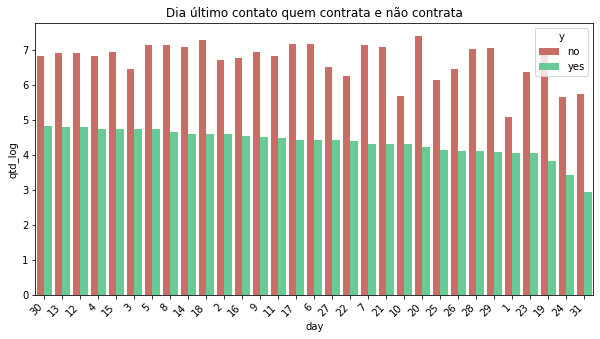

In [17]:
# - day x y (barras)
plt.figure(figsize=(10,5))

order = groupBy_df[groupBy_df.y == 'yes'].sort_values(by=['qtd'], ascending=False).day

chart = sns.barplot(x = 'day', y='qtd_log' , hue = 'y', data=groupBy_df, order = order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Dia último contato quem contrata e não contrata')

plt.show()


- nessa análise podemos observar que o comportamente é semelhante para os dias, com exeção dos dias `24 e 31` que há uma queda mais considerável nas contratações.
- e, ligações feita nos dias `17. 18, 20` tendem a não ter sucesso a efetivação do cliente



In [18]:
## criando nova base com LOG para melhorar a visualização
groupBy_df = pd.DataFrame(columns=['poutcome','y','qtd'])
i = 0
groupBy = dados_selec.groupby(['poutcome','y'])['y'].count()

for x in zip(groupBy.index, groupBy.values):
    groupBy_df.loc[i, ['poutcome','y','qtd']] = (x[0][0],x[0][1],x[1])
    i += 1

groupBy_df['qtd_log'] = np.log(groupBy_df.qtd.to_list())

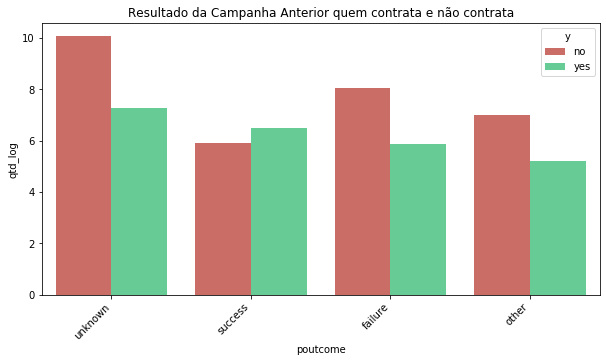

In [19]:
#- poutcome x y (boxplot)
plt.figure(figsize=(10,5))

order = groupBy_df[groupBy_df.y == 'yes'].sort_values(by=['qtd'], ascending=False).poutcome

chart = sns.barplot(x = 'poutcome', y='qtd_log' , hue = 'y', data=groupBy_df, order = order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Resultado da Campanha Anterior quem contrata e não contrata')

plt.show()

- como há muitos clientes que não foram contatados em campanhas anteriores, o valor `unknown` deve está relacionado a este fato.


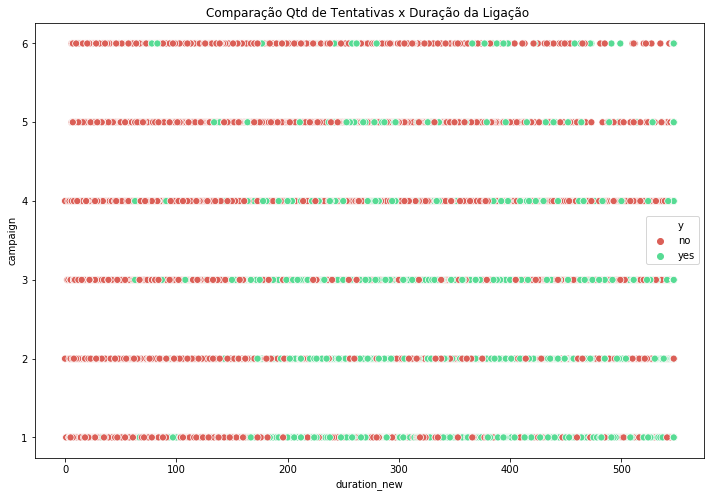

In [20]:
#- duration x age x y (scatter)
plt.figure(figsize=(12,8))
chart = sns.scatterplot(x = 'duration_new', y='campaign' , hue = 'y', data=dados_selec, s = 50) #, order = order)
plt.title('Comparação Qtd de Tentativas x Duração da Ligação ')
plt.show()

- neste gráfico podemos observar que clientes que receram poucas ligações sobre a campanha há mais chance de contratação com ligações que duram acima dos 200 segundos.


## <a id = "cluster"> 2. Análise com mineração de dados (cluster) </a>

Nessa seção será aplicada um algoritmo não-supervisionado para tentar agrupar perfis de clientes que contratam o serviço, assim, criando estratégias mais específicas.

´Está´ análise será apliada apenas para os clientes que contrataram o serviço, ou seja, `y==yes`

Para essa aplicação os dados passarão por uma nova transformação nas variáveis categóricas. Elas serão convertidas em colunas e receberá o valor 0/1 para indicar se os respectivos registros não tem ou tem aquele valor.

In [21]:
dados_yes = dados.loc[dados.y == 'yes',['age','duration_new','day','campaign', 'job','month','contact','marital']]

dummies = pd.get_dummies(dados_selec[['job','month','contact','marital']],prefix='',prefix_sep='')
dados_dummies = pd.concat([dados_yes[['age','duration_new','day','campaign']], dummies], axis=1, join='inner')
dados_dummies

,age,duration_new,day,campaign,admin.,blue-collar,entrepreneur,housemaid,management,retired,...,may,nov,oct,sep,cellular,telephone,unknown,divorced,married,single
245,42,547.0,5,2,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
416,37,547.0,6,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1199,49,513.0,8,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1227,28,442.0,8,2,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1478,35,547.0,9,4,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40678,36,270.0,16,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
40681,53,226.0,17,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
40682,34,224.0,17,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
40683,23,266.0,17,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


Os dados passarão por uma normalização dos valores

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_2_scaler = scaler.fit_transform(dados_dummies)

Será utilizado o algoritmo Kmeans com 4 cluster.

In [23]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=4,random_state=42)
cluster = kmean.fit_predict(dados_2_scaler)

dados_yes['cluster'] = cluster
dados_yes.cluster.value_counts()

3    1217
2     936
1     269
0     172
Name: cluster, dtype: int64

In [24]:
for k in dados_yes.cluster.sort_values().unique():
    print(" "*15,"="*25,"Grupo de Clientes: ", k,"="*25)
    temp = dados_yes.loc[dados_yes.cluster == k,:]
    print(' Idade entre {} e {} ano;\n Ocupação: "{}"; '.format(temp.age.min(),temp.age.max(),
                                                                           temp.job.value_counts().index[0]))
    
    print(' Duração das ligações: média de {:.2f} segundos; \n Tentativas: em média {:.2f} vez(es)'.format(
                                                                                           #temp.duration_new.min(),
                                                                                           temp.duration_new.mean(),
                                                                                           temp.campaign.mean()))
    print(' Dia ligação: {};\n Mês: {}'.format(temp.day.median(),
                                                                  temp.month.value_counts().index[0]))

    print("="*100,"\n")


                ========================= Grupo de Clientes:  0 =========================
 Idade entre 43 e 70 ano;
 Ocupação: "retired"; 
 Duração das ligações: média de 321.13 segundos; 
 Tentativas: em média 1.68 vez(es)
 Dia ligação: 14.0;
 Mês: aug

                ========================= Grupo de Clientes:  1 =========================
 Idade entre 19 e 69 ano;
 Ocupação: "management"; 
 Duração das ligações: média de 357.61 segundos; 
 Tentativas: em média 1.86 vez(es)
 Dia ligação: 15.0;
 Mês: jun

                ========================= Grupo de Clientes:  2 =========================
 Idade entre 18 e 61 ano;
 Ocupação: "management"; 
 Duração das ligações: média de 309.91 segundos; 
 Tentativas: em média 1.69 vez(es)
 Dia ligação: 14.0;
 Mês: may

                ========================= Grupo de Clientes:  3 =========================
 Idade entre 20 e 69 ano;
 Ocupação: "management"; 
 Duração das ligações: média de 319.03 segundos; 
 Tentativas: em média 1.84 vez(es)
 D

Com o algoritmo de cluster podemos identificar melhor e mais facilmente o perfil dos clientes que contrataram o novo serviço.
- **Cluster 0**: Cliente com idade entre 43 e 70 anos, aposentados tendem a aderir o novo serviço quando o serviço é oferecido no dia 14 no mês de agosto com ligações que duram em média 321 segundos.
<p></p>
- **Cluster 1**: Cliente com idade entre 16 e 69 anos, que trabalham como gerente  tendem a aderir o novo serviço quando é oferecido a ele no dia 15 no mês de junho com ligações que duram em média 357 segundos.
<p></p>
- **Cluster 2**: Cliente com idade entre 18 e 61 anos, que trabalham como gerente  tendem a aderir o novo serviço quando é oferecido a ele no dia 14 no mês de Abril com ligações que duram em média 309 segundos.
<p></p>
- **Cluster 3**: Cliente com idade entre 20 e 69 anos, que trabalham como gerente  tendem a aderir o novo serviço quando é oferecido a ele no dia 14 no mês de agosto com ligações que duram em média 319 segundos.

## <a id = "conclusao"> 3. Conclusões </a>
1. Focar esse tipo de serviço para clientes:
    - entre 20 e 35 anos, e acima de 60 anos.
    - cliente com cargos de `management, tech e admin`
    - as ligações devem duram em média ~300 segundos, com duração máxima até de ~500 segundos
    - as ofertas devem ser feitas preferencialmente nos meses de `abril,maio, junho e agosto`. Porém, pode-se fazer algumas ofertas nos meses de `março`,`outubro, setembro e dezembro` e posteriormente verificar o comportamente das campanhas para estes meses para verificar a eficácia.
    - deve-se evitar fazer ligações nos dias `24 e 31`, já que foi identificada uma queda mais considerável nas contratações nestes dias.


2. Com o resultado do cluster:
    - temos um perfil de clientes mais elaborado, por exemplo, entrar em contato com os clientes entre 43 e 70 anos no mês de agosto.
    - podemos observar que não há uma variação entre os agrupamentos em relação a dia do mês. 
    - a idade dos cliente te uma pequena variação entre os grupos.


3. os resultados do cluster confirmaram algumas das análises feitas anteriormente, principalmente em relação a duração da ligação e o mês para entrar em contato com os cliente. E estes resultados henriqueceram as nossas informações obtidas atráves das análises gráficas.
    - o resultado do cluster pode ser melhorado aplicando alguma técnica de escolha da quantidade de cluster ou com uma análise de alguém da área de negócio.
    - Poderia tentar também utilizar outro algoritmo de clusterização, como hcluster, BDSCAN.

